In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/miniconda3/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.1

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DispatchDoctor ─ v0.4.22
    Updating `~/miniconda3/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.0+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/miniconda3/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.16.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed15

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [9]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [10]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [11]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [12]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_mag"] < 0.001]
df_4 = df_2.loc[df_2["reference_dimensionless_spin2_mag"] < 0.001]
df_5 = df_4.loc[df_4["deprecated"] == False]
df_3 = df_5.loc[np.isfinite(df_5["common_horizon_time"])]
#df_3 represents the low eccentricity and low spin simulations that will be relevant for my project

In [13]:
ref_orb_period_3 = 2*np.pi/df_3["reference_orbital_frequency_mag"]
init_param = np.column_stack((ref_orb_period_3, df_3["reference_mass_ratio"]))

CHT = df_3["common_horizon_time"] - df_3["reference_time"]

In [7]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)

best_MSE = 78936 #This is the MSE of the model that I created myself with basic gravitational wave physics

In [8]:
#Try to define the model to use rational powers because that is what is present in the post-Newtonian expansions
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
)

#I think that the 'populations' parameter lets me dictate the number of expressions/equations that I want the machine learning model to try and generate
#niterations describes how long the machine learning model is allowed to train I think on the data. Basically how long I give it to converge I believe

In [10]:
num = 100

for i in range(num):
    model.fit(init_param, CHT)
    CHT_pred = model.predict(init_param)
    current_MSE = np.power(CHT_pred - CHT, 2).mean()
    
    print("Current Prediction MSE:", current_MSE)
    print("Best Prediction MSE:", best_MSE)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_3["reference_mass_ratio"], (CHT_pred - CHT)/CHT*100, marker = ".", label = "PySR")
    plt.xlabel("Mass ratio")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")    
    
    if current_MSE < best_MSE:
        best_MSE = current_MSE
        best_model = model.equations_
        plt.savefig(f"best_model_{round(best_MSE)}.png")
        with open(f'best_model_{round(best_MSE)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_MSE < 1.5*best_MSE:
        plt.savefig(f"good_model_{round(current_MSE)}.png")
        with open(f'good_model_{round(current_MSE)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6601e-05
5           3.761e+06  1.039e-01  y = x₀ * (x₀ * 0.042726)
6           3.309e+06  -0.000e+00  y = (cube(x₀) * 6.1638e-05) + 2269.2
7           1.141e+06  7.554e-01  y = (sqrt(x₁) * 5.7818e-05) * cube(x₀)
8           8.229e+05  2.438e-01  y = cube((x₁ * 13.602) + x₀) * 6.5713e-05
9           6.841e+05  1.122e-01  y = cube((x₁ * sqrt(x₀)) + x₀) * 5.8354e-05
11          2.884e+05  3.962e-01  y = cube((sqrt(x₀ + -99.857) * x₁) + x₀) * 6.1496e-05
12          2.422e+05  1.561e-01  y = (6.272e-05 * cube(x₀ + (sqrt(x₀) * x₁))) - cube(x₁)
13          9.314e+04  9.356e-01  y = cube((x₁ * (sqrt(x₀ + -238.22) + 7.1607)) + x₀) * 5.92...
                                      16e-05
14          9.204e+04

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.766e+06  1.356e-01  y = 0.042369 * square(x₀)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           3.309e+06  -0.000e+00  y = 2269.2 - (cube(x₀) * -6.1637e-05)
8           2.213e+05  1.248e+00  y = (cube(x₀) * (x₁ - -3.735)) * 1.3664e-05
10          8.090e+04  4.925e-01  y = (x₁ - -4.6743) * (9.7114e-06 * cube(x₀ + 35.094))
12          6.506e+04  1.065e-01  y = (x₁ - -4.5887) * ((cube(x₀ + 58.304) * 9.0127e-06) + -...
                                      51.651)
14          6.506e+04  -0.000e+00  y = ((x₁ - -4.5887) * ((cube(x₀ + 58.304) * 9.0127e-06) +...
                                        -51.651)) - 0.070708
17          6.076e+04  2.139e-02  y = (cube(63.523 + x₀) * (8.2122e-06 * (x₁ - -5.1222))) - ...
     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           3.761e+06  6.825e-02  y = (x₀ * 0.042726) * x₀
7           2.879e+06  -0.000e+00  y = x₀ * (x₁ + (x₀ * 0.0373))
9           1.146e+06  3.239e-01  y = ((x₁ + -11.877) + (x₀ * 0.060987)) * x₀
10          1.105e+06  -0.000e+00  y = ((-11.877 + (x₀ * 0.060987)) * x₀) * cbrt(x₁)
11          6.895e+05  3.761e-01  y = x₀ * ((x₀ + ((x₁ * 23.778) + -255.23)) * 0.06892)
12          5.553e+05  1.417e-01  y = sqrt(cube(((x₁ + sqrt(x₀ - 204.4)) * x₀) * 0.049151))
13          2.075e+05  9.434e-01  y = x₀ * (((x₀ + (x₀ * (x₁ * 0.084562))) + -250.76) * 0.06...
                                      1224)
15          8.378e+04  4.439e-01  y = ((x₀ * 0.063209) - 8.59) * (((x₁ * 0.13276) * x₀) + (x...
                                      ₀ + -188.52))
17  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           3.056e+06  -0.000e+00  y = square((x₀ * 0.2067) + x₁)
8           2.316e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.21593)) - 1446.1
9           1.146e+06  4.782e-01  y = (x₁ - ((x₀ - 194.74) * -0.060987)) * x₀
11          2.479e+05  7.307e-01  y = ((x₀ - 187.7) * ((x₁ * 0.01002) - -0.047264)) * x₀
13          1.446e+05  2.564e-01  y = (x₀ - 197.52) * ((-14.637 + (4.5114 * x₁)) - (x₀ * -0....
                                      077825))
15          8.627e+04  2.517e-01  y = ((x₁ + x₀) - 149.65) * ((((x₁ * 0.008277) - -0.062904)...
                                       * x₀) + -10.779)
17          6.510e+04  1.382e-01  y = ((x₀ + (x₁ - 239.84)) * (((x₁ * 5.4595) - (x₀ * -0.094...
 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6601e-05
5           4.771e+06  -0.000e+00  y = x₀ * (x₀ * 0.047775)
6           3.311e+06  5.779e-02  y = (cube(x₀) * 6.1968e-05) + 2219
7           2.319e+06  5.068e-02  y = ((x₁ + 42.325) * x₀) + -11085
8           1.382e+06  3.274e-01  y = (x₁ * x₀) + cube(0.041787 * x₀)
9           1.146e+06  4.649e-02  y = (x₁ - ((x₀ + -194.74) * -0.060987)) * x₀
11          2.075e+05  8.132e-01  y = (((x₁ + 11.825) * x₀) - 2965.1) * (x₀ * 0.0051773)
13          1.434e+05  1.737e-01  y = x₀ * (((x₁ - -6.4087) * ((x₀ + -136.27) * 0.0085021)) ...
                                      + -5.3154)
15          4.659e+04  5.561e-01  y = ((x₀ + -157.32) * ((x₀ * ((x₁ - -8.1497) * 0.0090573))...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.068e+06  -0.000e+00  y = square(x₀ * 0.22016)
5           3.761e+06  7.932e-03  y = x₀ * (x₀ * 0.042726)
6           3.360e+06  -0.000e+00  y = (cube(x₀) * 6.3776e-05) - -1945
7           2.319e+06  6.151e-02  y = ((x₁ + 42.323) * x₀) - 11085
9           1.146e+06  2.396e-01  y = x₀ * ((x₀ * 0.060987) + (-11.877 + x₁))
11          6.603e+05  2.243e-01  y = (((sqrt(sqrt(x₁)) * x₀) + -229.57) * x₀) * 0.059495
13          1.446e+05  7.250e-01  y = (((x₁ + (x₀ * 0.017255)) + -3.2453) * 4.5105) * (x₀ + ...
                                      -197.5)
15          7.435e+04  3.249e-01  y = (((x₁ + (x₀ * 0.018624)) + -5.1713) * ((x₀ + -217.21) ...
                                      * 5.0016)) - -1197.1
17          7.435e+04  -0.000e+00  y 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165720_SZ5kdC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           3.521e+06  -0.000e+00  y = square(x₁ + x₀) * 0.042022
7           2.319e+06  9.573e-02  y = ((x₁ + 42.323) * x₀) + -11085
8           2.055e+06  -0.000e+00  y = square(x₀ * -0.053859) * (x₁ + 12.389)
9           1.906e+06  -0.000e+00  y = ((x₁ - (-45.298 - x₁)) * x₀) - 13728
10          1.606e+05  2.304e+00  y = (x₁ - -4.5155) * square((x₀ * -0.10735) + 13.724)
12          8.797e+04  2.938e-01  y = (x₁ + 4.6481) * (square((x₀ * -0.11428) + 19.814) + 14...
                                      3.75)
14          8.772e+04  -0.000e+00  y = (x₁ + 4.6481) * (square(((x₀ + -0.66704) * -0.11413) ...
                                    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165724_KE3lnH/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.1
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.2013))
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.323) * x₀) + -11085
8           1.226e+06  4.250e-01  y = cube(square(cbrt(x₁)) - (x₀ * -0.038914))
9           9.301e+05  1.973e-01  y = (square(-0.20614 * x₀) - 1726.9) * cbrt(x₁)
10          7.130e+05  1.874e-01  y = ((167.06 - x₀) * cbrt(x₁)) * (x₀ * -0.052874)
12          5.086e+05  1.475e-01  y = cbrt(x₁) * (((-276.62 - x₀) * x₀) * (-4.3384e-05 * x₀)...
                                      )
13          7.801e+04  1.825e+00  y = (-130.7 - x₀) * ((((x₁ + 4.7058) * -9.408e-06) * x₀) *...
                                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165728_G5HGiU/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042727
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           3.517e+06  -0.000e+00  y = square(x₀ + x₁) * 0.042331
7           2.319e+06  9.493e-02  y = (x₀ * (x₁ + 42.323)) - 11085
9           1.146e+06  2.396e-01  y = ((x₁ + (x₀ * 0.060988)) - 11.877) * x₀
11          9.224e+05  7.127e-02  y = ((0.053745 * square(x₀)) + cube(x₁ + -19.037)) - -1796...
                                      .7
13          9.071e+05  -0.000e+00  y = (square(x₀ + -34.647) * 0.057323) + (cube(x₁ + -18.51...
                                       9) - -2302.5)
14          7.230e+05  1.513e-01  y = (x₀ * ((x₁ * 1.6675) + (x₀ * 0.056465))) + (sqrt(x₀) *...
                                       -248.86)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7140.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.2013))
7           1.184e+06  6.162e-01  y = cbrt(x₁) * (cube(x₀) * 6.5806e-05)
9           5.069e+05  3.891e-01  y = cube(x₀ + 65.734) * (cbrt(x₁) * 4.6357e-05)
11          4.216e+05  7.375e-02  y = (cube((x₀ + x₁) - -53.936) * cbrt(x₁)) * 4.8451e-05
14          1.747e+05  2.814e-01  y = (square((x₀ * -0.12984) + 23.665) + ((x₀ + -199.36) * ...
                                      x₁)) * 4.3289
16          1.458e+05  8.102e-02  y = ((square((x₀ * -0.12867) + 24.453) + 0.58465) + ((x₀ +...
                                       -201.13) * x₁)) * 4.6075
18          9.686e+04  1.986e-01  y = x₀ + ((((x₀ + -205.4) * (x₁ * 4.66)) + squa

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction MSE: 41302.3187409986
Best Prediction MSE: 11427.663320806947
Current Model Formula: x0 + (0.036149003*sqrt(x0) + 0.00212392310358404*x0*x1 + 0.036149003*x0 + 0.036149003*x1*(-0.010605255*x1**2 - 0.5339343))**3
  - outputs/20250627_165739_sOeSvt/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           3.761e+06  6.825e-02  y = x₀ * (x₀ * 0.042726)
7           2.319e+06  7.156e-02  y = ((x₁ - -42.324) * x₀) + -11085
9           1.259e+06  2.018e-01  y = ((x₁ + (x₀ * 0.047775)) * x₀) - 2443
11          9.305e+05  1.106e-01  y = (((x₀ * 0.057334) + -14.678) + x₁) * (x₀ - -141.92)
12          7.889e+05  9.388e-02  y = (x₀ + -227.89) * (((x₁ + 14.444) * cbrt(x₀)) - 92.491)
13          5.404e+05  2.910e-01  y = (x₀ - 79.525) * ((x₁ + -16.375) + ((x₀ * 0.072647) + 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165742_g5mEBB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042724)
6           2.854e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.20131))
8           2.359e+06  -0.000e+00  y = square(x₁ - ((x₀ * -0.23201) + 15.271))
9           1.939e+06  5.447e-02  y = ((x₀ + 179.7) * (x₁ + 44.905)) - 20952
10          8.587e+05  6.825e-01  y = square(((x₁ * 3.4964) + -42.191) + (x₀ * 0.27109))
11          3.315e+05  8.740e-01  y = square((x₀ * -0.28484) + ((sqrt(x₁) * -17.911) + 66.88...
                                      2))
14          2.045e+05  1.527e-01  y = x₀ * (((x₀ * 0.061258) + -15.427) + (x₁ * (cbrt(x₀) - ...
                                      5.2

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165746_KUxiOo/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20127) - x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) + -11084
9           1.584e+06  1.066e-01  y = x₀ * square(cbrt(x₁) + (x₀ * 0.0070347))
10          8.579e+05  5.040e-01  y = square(((x₀ - 156.47) + (x₁ * 12.817)) * 0.27182)
11          4.426e+05  6.029e-01  y = x₀ * square(sqrt(x₁ * 0.48562) + (x₀ * 0.0070347))
13          4.289e+05  -0.000e+00  y = x₀ * (square(sqrt(x₁ * 0.48562) + (x₀ * 0.0070347)) -...
                                        0.19592)
14          4.074e+05  1.909e-02  y = (square((x₀ * 0.0070347) + sqrt(0.48562 * x₁)) * x₀) -...
               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165751_0fWAgr/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.20671)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.2013))
8           2.178e+06  -0.000e+00  y = x₀ * ((5.9737e-05 * square(x₀)) + x₁)
9           1.146e+06  4.287e-01  y = (x₁ + ((x₀ * 0.060982) + -11.875)) * x₀
10          2.110e+05  1.611e+00  y = (x₀ - (x₁ * -77.406)) * (square(x₀) * 5.9737e-05)
12          1.026e+05  3.527e-01  y = ((square(x₀) * 6.1782e-05) + -1.2057) * (x₀ - (x₁ * -9...
                                      4.079))
14          1.009e+05  4.408e-03  y = (x₀ - ((x₁ * x₀) * -0.21447)) * ((square(x₀) * 5.0489e...
                                      -0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction MSE: 52454.75371146339
Best Prediction MSE: 11427.663320806947
Current Model Formula: -164.4917*x1 + (x0 - (-107.48025)*x1)*(2.511854 - x0**2)*(-5.7305406e-5)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165755_yANrQn/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.20669)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20131) - x₁)
8           1.508e+06  2.129e-01  y = (cube(x₀) * 6.9566e-05) + (x₁ * 392.11)
9           9.300e+05  3.866e-01  y = ((square(x₀) * 0.042549) + -1727.8) * cbrt(x₁)
10          1.599e+05  1.673e+00  y = square(x₀ + -128.08) * ((x₁ + 4.4558) * 0.011665)
12          1.087e+05  1.872e-01  y = (cube(x₀) * 5.9152e-05) + (x₁ * ((x₀ * 4.4487) + -946....
                                      87))
13          3.815e+04  1.036e+00  y = (((square(x₀) * 0.0068146) + -226.36) * x₁) + (cube(x₀...
                                      ) * 5.5808e-05)
15          3.614e+04  2.496e-02  y = (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165759_iyDRJN/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.989e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20572))
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.323) * x₀) + -11085
8           2.181e+06  -0.000e+00  y = cube(x₀ * 0.042726) + (x₀ * x₁)
9           1.842e+06  3.069e-02  y = x₀ * (((x₀ + -139.84) * 0.056671) + x₁)
10          7.130e+05  7.995e-01  y = (cbrt(x₁) * x₀) * ((x₀ * 0.052874) - 8.8331)
11          2.479e+05  1.012e+00  y = (x₀ * ((x₁ * 0.01002) - -0.047265)) * (x₀ - 187.7)
13          1.446e+05  2.564e-01  y = (x₀ + -197.51) * ((x₁ * 4.511) - ((x₀ * -0.077825) + 1...
                                      4.636))
15          7.496e+04  3.209e-01  y = ((x₀ - 21

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165802_WgAHdQ/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.2013) - x₁)
8           2.316e+06  -0.000e+00  y = square((x₀ * -0.21592) - x₁) + -1445.9
9           1.402e+06  3.143e-01  y = square((inv(x₁) * 30.205) + (x₀ * -0.24437))
10          8.578e+05  3.941e-01  y = square(((157.24 - x₀) * -0.27233) - (x₁ * -3.4959))
11          5.739e+05  3.126e-01  y = square((x₀ + (-319.5 - (-139.25 * cbrt(x₁)))) * -0.287...
                                      65)
13          2.661e+05  3.517e-01  y = square((((x₁ + -139.25) * cbrt(x₁)) - (x₀ + -319.5)) *...
                                       -0.28765)
15          2.313e+05  6.116e-02  y = square(((x₁ + (cbrt(x₁) * -130.78)) - (x₀ + -347.29)) ...
   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.2013))
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.324) * x₀) - 11085
9           6.564e+05  5.313e-01  y = square(-25.446 - (x₀ * -0.23802)) * cbrt(x₁)
11          2.320e+05  4.985e-01  y = ((x₀ * (x₁ - -12.828)) + -3126.4) * (x₀ * 0.0047789)
13          1.394e+05  2.416e-01  y = (((x₁ - -6.9848) * (x₀ + -123.75)) + -786.85) * (x₀ * ...
                                      0.0079714)
15          4.745e+04  5.333e-01  y = (((x₀ + -157.71) * (((x₁ - -8.01) * x₀) + -2079.1)) * ...
                                      0.0090596) + 1033.8
17          4.539e+04  2.012e-02  y = ((x₀ + (x₁ + -176.32)) * (((x₀ * (x₁ - -7.9285)) + -

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165813_jmdku1/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           3.309e+06  -0.000e+00  y = (cube(x₀) * 6.1638e-05) + 2269.2
7           1.141e+06  7.554e-01  y = (cube(x₀) * 5.7818e-05) * sqrt(x₁)
8           2.213e+05  1.563e+00  y = ((x₁ + 3.7362) * cube(x₀)) * 1.3661e-05
10          8.090e+04  4.925e-01  y = cube(x₀ + 36.166) * ((x₁ * 9.5967e-06) + 4.5238e-05)
12          7.079e+04  6.230e-02  y = (((x₁ + 4.8538) * cube(x₀ + 46.272)) * 9.1158e-06) + -...
                                      244.84
14          5.982e+04  8.190e-02  y = ((x₁ + 4.5824) * ((cube(x₀ + 75.879) * 8.4824e-06) - 8...
                                    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165817_Qj6aZd/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20132))
7           1.141e+06  6.447e-01  y = sqrt(x₁) * (cube(x₀) * 5.7817e-05)
8           2.213e+05  1.563e+00  y = (5.1042e-05 - (x₁ * -1.3661e-05)) * cube(x₀)
10          8.089e+04  4.926e-01  y = (cube(x₀ + 35.181) * (x₁ - -4.6779)) * 9.7018e-06
12          6.898e+04  7.506e-02  y = (((x₁ + 4.9045) * cube(x₀ - -55.061)) * 8.7345e-06) - ...
                                      371.29
14          5.703e+04  9.278e-02  y = cube((x₀ - -47.299) + -5.0618) * (cbrt(square(x₁) + 5....
                                      9442) * 2.8323e-05)
16          5.623e+04  5.074e-03  y = (((cu

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165821_KyH1Ee/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042728
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20127))
8           2.316e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.21593)) + -1444
9           1.146e+06  4.782e-01  y = ((x₁ + -11.877) + (x₀ * 0.060987)) * x₀
10          8.580e+05  2.095e-01  y = square((x₀ * 0.2715) + ((x₁ + -12.18) * 3.4754))
12          8.578e+05  -0.000e+00  y = square(((x₀ * 0.27235) + ((x₁ + -12.703) * 3.4953)) -...
                                        -1.5774)
13          3.927e+05  7.152e-01  y = cube(x₁ - sqrt(x₀)) + ((x₀ + -91.005) * (x₀ * 0.091114...
                                      ))
15          3.499e+05  4.057e-02  y = ((x₁ + (x₀ -

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165825_qVeUAN/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6601e-05
5           3.761e+06  1.039e-01  y = x₀ * (x₀ * 0.042726)
7           3.637e+06  -0.000e+00  y = (x₀ * (x₁ + x₀)) * 0.042531
8           2.831e+06  -0.000e+00  y = (cbrt(x₁) * (x₀ + -244.76)) * 36.212
9           1.906e+06  2.251e-01  y = ((x₀ + x₀) * (x₁ + 22.651)) + -13730
10          7.130e+05  8.288e-01  y = (x₀ + -167.06) * (x₀ * (cbrt(x₁) * 0.052874))
11          2.479e+05  1.012e+00  y = (x₀ * ((x₁ * 0.010021) + 0.047265)) * (x₀ + -187.71)
13          8.380e+04  5.309e-01  y = (x₀ + -136.01) * ((((x₁ * 0.0083828) + 0.063262) * x₀)...
                                       - 11.919)
15          7.177e+04  7.295e-02  y = (((x₀ * ((x₁ * 0.0074536) + 0.073101)) + -20.872) * (x...
     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165832_cOTxSx/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20127) + x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) + -11085
8           1.898e+06  5.829e-02  y = (x₁ * x₀) + (7.6601e-05 * cube(x₀))
9           1.941e+05  2.138e+00  y = (x₁ + 3.8925) * cube(sqrt(x₀) + -10.264)
11          9.587e+04  3.449e-01  y = (x₁ + 4.6354) * (cube(sqrt(x₀) + -11.061) + 106.26)
13          7.681e+04  1.060e-01  y = (x₁ + 4.8929) * (cube(sqrt(x₀ + x₁) + -11.244) - -90.5...
                                      63)
15          7.658e+04  -0.000e+00  y = ((cube(sqrt(x₀ + x₁) + -11.248) - -94.162) * (x₁ + 4....
                                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165836_sHkHx6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           4.809e+06  -0.000e+00  y = (214.51 - x₀) * -39.348
6           3.709e+06  -0.000e+00  y = -438.69 - (square(x₀) * -0.044607)
7           3.671e+06  -0.000e+00  y = ((56.293 - x₀) * -0.04813) * x₀
8           3.397e+06  -0.000e+00  y = -676.69 - (square(x₀ + x₁) * -0.045218)
9           2.109e+06  1.384e-01  y = -12935 - (((-44.402 - x₁) - x₁) * x₀)
11          1.146e+06  2.013e-01  y = sqrt(square((-11.877 - ((x₀ * -0.060987) - x₁)) * x₀))
12          9.300e+05  1.349e-01  y = square(sqrt(cbrt(x₁) * (((x₀ * x₀) * 0.042548) + -1727...
                                      .8)))
14          4.201e+05  3.639e-01  y = sqrt(square((((x₀ * cbrt(x₁)) + -449.44) + x₀) * (-0.0...
               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165840_ezck9i/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20127))
7           1.141e+06  6.447e-01  y = sqrt(x₁) * (cube(x₀) * 5.7817e-05)
9           4.114e+05  4.685e-01  y = cube((cbrt(x₁ + 5.0228) * x₀) * 0.022331)
11          1.168e+05  6.162e-01  y = cube((x₀ * 0.026681) * sqrt(cbrt(square(x₁) + 11.485))...
                                      )
13          5.921e+04  3.356e-01  y = x₀ + cube(cbrt(sqrt(square(x₁) + 11.171)) * (x₀ * 0.02...
                                      6395))
15          5.436e+04  4.063e-02  y = (x₀ + cube((cbrt(sqrt(square(x₁) + 11.008)) * 0.024598...
                                      ) * x₀)) * 1.2276


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165844_q6K8Vr/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20128))
7           2.378e+06  -0.000e+00  y = ((x₁ + 43.294) * x₀) - 11683
8           2.316e+06  -0.000e+00  y = square((x₀ * -0.21596) - x₁) + -1444.8
9           2.136e+06  -0.000e+00  y = ((x₁ + x₀) * (x₁ + 43.293)) - 11683
10          8.578e+05  7.676e-01  y = square(157.22 - (x₀ + (x₁ * 12.832))) * 0.074165
12          8.366e+05  -0.000e+00  y = square((((x₁ * 13.093) - 184.52) + x₀) * 0.2814) + 69...
                                       0.94
13          1.889e+05  1.421e+00  y = (sqrt(cube((x₀ * (x₁ + 13.556)) + -923.31)) * 3.5431e-...
                                    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165847_ja5wX3/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           3.052e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.20665))
7           2.433e+06  -0.000e+00  y = (x₀ * (x₁ + 42.164)) + -11358
8           2.359e+06  -0.000e+00  y = square((x₀ * 0.23197) + (x₁ - 15.252))
9           1.146e+06  4.927e-01  y = x₀ * (((x₀ - 194.82) * 0.060992) + x₁)
11          3.936e+05  4.909e-01  y = ((x₁ - (x₀ * -0.012681)) * -4.3893) * (214.21 - x₀)
13          1.446e+05  4.800e-01  y = ((x₁ - ((x₀ * -0.01725) + 3.2439)) * -4.5115) * (197.5...
                                      3 - x₀)
15          7.435e+04  3.249e-01  y = (((x₁ - 5.1654) + (x₀ * 0.01862)) * ((217.14 - x₀) * -...
                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.1
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.20131))
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.323) * x₀) - 11085
8           1.408e+06  3.116e-01  y = (x₁ * x₀) + cube(x₀ * 0.041837)
9           6.564e+05  6.376e-01  y = (square(x₀ + -107.28) * cbrt(x₁)) * 0.056791
10          1.599e+05  1.350e+00  y = (square(x₀ + -128.08) * (x₁ + 4.4559)) * 0.011665
12          8.346e+04  3.177e-01  y = ((square(x₀ + -176.71) * 0.013887) + 148.25) * (x₁ + 4...
                                      .3874)
14          7.754e+04  3.258e-02  y = ((x₁ + 4.704) * ((square(x₀ + -168.94) * 0.012949) + 1...
                         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165859_EDbRoZ/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7140.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.770e+06  -0.000e+00  y = square(((x₀ + x₁) * 0.20012) + x₁)
9           1.146e+06  6.183e-01  y = ((x₀ * 0.060987) + (x₁ + -11.877)) * x₀
10          2.110e+05  1.611e+00  y = square(x₀) * (5.9737e-05 * (x₀ - (x₁ * -77.404)))
12          7.772e+04  4.890e-01  y = (x₀ - (x₁ * -105.13)) * ((square(x₀) * 6.0379e-05) + -...
                                      1.3433)
14          3.815e+04  3.518e-01  y = (((x₀ - (x₁ * -122.06)) * 5.5812e-05) * square(x₀)) - ...
                                      (x₁ * 226.12)
16          3.797e+04  4.020e-04  y = ((((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6605e-05
5           3.761e+06  1.039e-01  y = x₀ * (x₀ * 0.042726)
6           3.309e+06  -0.000e+00  y = (cube(x₀) * 6.1643e-05) + 2269.1
7           1.184e+06  7.279e-01  y = cbrt(x₁) * (cube(x₀) * 6.5806e-05)
8           1.180e+06  -0.000e+00  y = (cube(x₀) * 6.8861e-05) + (x₁ * x₀)
9           5.070e+05  7.744e-01  y = cube(x₀ - -64.845) * (cbrt(x₁) * 4.6572e-05)
11          2.110e+05  4.198e-01  y = (cube(x₀) * 5.9737e-05) - ((x₁ * square(x₀)) * -0.0046...
                                      238)
12          1.087e+05  6.482e-01  y = (x₁ * (-946.86 - (x₀ * -4.4487))) + (5.9152e-05 * cube...
                                      (x₀))
13          3.818e+04  1.035e+00  y = (5.5769e-05 * cube(

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042727
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20131))
8           2.316e+06  -0.000e+00  y = square((x₀ * 0.21606) + x₁) + -1455
9           1.146e+06  4.782e-01  y = ((x₀ * 0.060988) + (-11.877 + x₁)) * x₀
10          1.121e+06  -0.000e+00  y = (square(x₀ + -128.23) * 0.066712) + (x₀ * x₁)
11          9.305e+05  1.137e-01  y = (x₀ + 142.04) * (x₁ + ((x₀ * 0.05733) + -14.679))
12          7.190e+05  1.800e-01  y = square((x₀ * -0.28252) + 49.851) + ((x₁ * x₀) * 1.557)
13          3.933e+05  5.476e-01  y = (((x₀ + (x₁ * -4.7012)) * -0.94431) + x₀) * (x₀ + -214...
                                      .78)
14          1.444e+05  9.604e-01  y = square((x₀ + -191.63) * -0.27812) + 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165913_TwV1Pr/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20132))
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) + -11084
8           2.055e+06  -0.000e+00  y = (x₁ + 12.377) * (square(x₀) * 0.0029031)
9           1.146e+06  3.815e-01  y = x₀ * ((x₀ * 0.060987) + (x₁ + -11.877))
10          2.110e+05  1.611e+00  y = square(x₀) * ((x₀ * 5.9738e-05) + (x₁ * 0.0046238))
11          2.110e+05  -0.000e+00  y = (((x₀ * 5.9737e-05) + (x₁ * 0.0046238)) * x₀) * x₀
12          1.345e+05  4.262e-01  y = square(x₀ - 60.76) * ((x₁ + (x₀ * 0.0090601)) * 0.0076...
                                      32)
14          4.495e+04  5.422e-01  y 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165916_el4TeN/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.2013) + x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ - -42.323)) + -11085
9           1.070e+06  2.669e-01  y = (square(x₀) * 0.0041087) * (x₁ + cbrt(x₀))
10          3.583e+05  1.005e+00  y = ((x₁ - -8.5931) * (square(x₀) * 0.0051482)) + -3163.9
11          2.161e+05  4.801e-01  y = ((square(x₀) * 0.0049042) * (x₁ + cbrt(x₀))) - 1914.8
12          1.524e+05  3.273e-01  y = (square((145.2 - x₀) * 0.10292) + 82.618) * (x₁ - -5.2...
                                      33)
13          1.193e+05  2.351e-01  y = (x₀ * ((x₀ + (x₁ * 105.48)) * 6.6924e-05)) * (x₀ + -93...
                                      .16)
15          3.896e+04

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20131) - x₁)
8           2.359e+06  -0.000e+00  y = square((x₁ - (x₀ * -0.23204)) - 15.279)
9           1.372e+06  3.471e-01  y = (square(x₀) * 0.055428) - cube(16.996 - x₁)
10          8.578e+05  3.745e-01  y = square((157.39 - x₀) + (x₁ * -12.817)) * 0.074236
11          2.773e+05  1.037e+00  y = square(((x₀ * 0.28607) - 84.726) - (cbrt(x₁) * -34.217...
                                      ))
13          2.387e+05  6.602e-02  y = square(((x₀ * -0.30303) - -101.92) - (cbrt(x₁) * 36.96...
                                      5)) + 901.45
14          1.446e+05  4.754e-01  y = square((x₀ * 0.27892) + -53.878) - (x₁ * ((x₀ + -197.4...
    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20126))
8           2.359e+06  -0.000e+00  y = square((x₁ + -15.221) + (x₀ * 0.23199))
9           1.906e+06  6.927e-02  y = ((x₁ + 22.649) * (x₀ + x₀)) + -13729
10          2.110e+05  2.069e+00  y = square(x₀) * ((x₀ * 5.9736e-05) + (x₁ * 0.0046238))
12          1.062e+05  3.357e-01  y = ((((x₁ * 1.2496e-05) + 3.79e-05) * x₀) + 0.008669) * s...
                                      quare(x₀)
14          3.820e+04  5.058e-01  y = (square(x₀) * ((5.5789e-05 * x₀) + (0.006803 * x₁))) -...
                                       (x₁ * 225.81)
16          3.809e+04  -0.000e+00  y = (square(x₀) * (((x₁ * 0.0068212) + -0.00022686) + (x₀...
 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20671)
6           2.942e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.19768))
7           2.889e+06  -0.000e+00  y = square(x₁ + (x₀ * square(0.44612)))
8           2.359e+06  -0.000e+00  y = square((x₀ * 0.232) + (x₁ + -15.264))
10          1.121e+06  2.552e-01  y = square((127.96 - x₀) * 0.25803) + (x₁ * x₀)
12          8.578e+05  9.453e-02  y = square((x₁ * 3.4876) + (((x₀ - 159.98) * 0.27215) + 0....
                                      82557))
14          1.444e+05  8.467e-01  y = (((x₀ - 197.96) * x₁) * 4.5185) + (square(192.33 - x₀)...
                                       * 0.077619)
16          9.112e+04  2.239e-01  y = (square((x₀ - 221.72) * 0.29175) + ((x₀ - 209.74) * (x...
              

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165935_0DCChU/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.1
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square(x₁ + (0.20131 * x₀))
8           2.359e+06  -0.000e+00  y = square(x₁ + ((x₀ * 0.23193) + -15.246))
9           1.906e+06  6.928e-02  y = (((x₁ + 45.298) + x₁) * x₀) - 13728
10          1.107e+05  2.720e+00  y = square((x₀ - 141.07) * (x₁ - -11.444)) * 0.00043721
12          9.452e+04  7.432e-02  y = (square((x₀ - 143.91) * (x₁ + 11.758)) * 0.00041526) +...
                                       263.81
14          6.889e+04  1.528e-01  y = (square(((124.01 - x₀) * (x₁ + 13.141)) - -689.89) * 0...
                                      .00037624) + 828.54
18          6.495e+04  1.370e-02  y = (sq

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165938_HKs31e/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.8
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042728
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20132))
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.324)) + -11085
8           2.316e+06  -0.000e+00  y = square((x₀ * 0.21597) + x₁) - 1447.6
9           6.780e+05  1.035e+00  y = square((x₁ + 10.305) * (-13.98 + sqrt(x₀)))
10          6.391e+05  -0.000e+00  y = square(((x₀ * cbrt(cbrt(x₁))) * 0.25079) + -30.693)
11          5.819e+05  2.736e-02  y = square((47.916 - sqrt(x₁ * 174.24)) - (x₀ * 0.26126))
12          2.639e+05  7.239e-01  y = square((((x₀ * 0.26658) + x₁) * cbrt(cbrt(x₁))) + -43....
                                      236)
13          1.278e+05  7.096e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165942_zuuRU8/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20129) - x₁)
8           2.055e+06  8.421e-02  y = square(x₀) * (0.0029064 * (x₁ + 12.358))
9           1.776e+06  1.065e-02  y = (x₁ + (x₀ * 0.050423)) * (x₀ - 113.87)
10          1.627e+05  2.233e+00  y = square(13.372 - (x₀ * 0.10582)) * (x₁ - -4.666)
12          1.434e+05  5.458e-02  y = (x₁ - -4.666) * (x₁ + square(13.372 - (0.10557 * x₀)))
13          7.680e+04  6.097e-01  y = ((x₀ * -0.0092633) - x₁) * ((x₀ * (x₀ * -0.0065024)) +...
                                       152.14)
15          3.903e+04  3.346e-01  y = -0.008435 * ((((-0.0053159 * x₀) - x₁) - 2.0099) * (x₀..

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165949_05jzrl/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20131))
8           2.153e+06  -0.000e+00  y = square(x₀ * 0.048909) * (x₁ + 15.074)
10          1.618e+05  1.200e+00  y = square((x₀ * -0.10742) + 13.712) * (x₁ + 4.4791)
12          8.773e+04  2.989e-01  y = (square((x₀ * 0.11525) + -20.437) + 153.85) * (x₁ + 4....
                                      6372)
14          7.929e+04  4.633e-02  y = ((square((x₀ * 0.11189) + -18.957) + 153.66) * (x₁ + 5...
                                      .0235)) - x₀
16          7.310e+04  3.636e-02  y = ((square((x₀ * 0.10546) + -15.094) + 123.59) * (x₁ + 5...
                                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_165953_vG7BPN/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7140.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20131) - x₁)
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.323) * x₀) + -11085
9           1.146e+06  2.396e-01  y = ((x₁ - 11.877) + (x₀ * 0.060988)) * x₀
11          1.084e+06  -0.000e+00  y = ((x₁ - 11.877) + (x₀ * 0.060988)) * (x₀ + x₁)
12          2.885e+05  1.212e+00  y = ((x₁ - 15.829) + sqrt(x₀)) * ((x₀ * 3.6052) + -604.97)
14          1.045e+05  4.970e-01  y = ((((sqrt(x₀) + x₁) - 18.448) * 4.7483) * (x₀ + -212.19...
                                      )) - -1828.4
16          1.045e+05  -0.000e+00  y = ((((x₀ + -211.99) * ((sqrt(x₀) + x₁) - 18.454)) * 4.7...
            

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


  - outputs/20250627_165957_zAuh5R/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20671)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.864e+06  -0.000e+00  y = square((0.2025 * x₀) + x₁)
8           1.180e+06  3.109e-01  y = (x₁ * x₀) + (cube(x₀) * 6.8865e-05)
9           1.146e+06  -0.000e+00  y = ((x₀ * 0.060987) + (x₁ + -11.877)) * x₀
10          1.031e+06  3.899e-02  y = (x₁ * x₀) + (cube(x₀ + x₁) * 6.8865e-05)
11          3.933e+05  8.847e-01  y = ((x₀ - (x₁ * -79.711)) * (x₀ + -214.78)) * 0.055697
13          1.449e+05  4.785e-01  y = ((x₀ - ((x₁ * -57.807) - -187.64)) * 0.07766) * (x₀ + ...
                                      -197.48)
15          7.435e+04  3.261e-01  y = (((x₀ * 4.9971) + -

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170001_rokqJd/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20131))
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.321) * x₀) - 11084
9           1.146e+06  2.396e-01  y = x₀ * (x₁ + ((x₀ * 0.060986) + -11.876))
11          9.075e+05  7.881e-02  y = (((x₀ * 0.02534) + x₁) * (x₀ + x₀)) - 4334
13          3.255e+05  4.709e-01  y = (-15.513 + (x₀ * 0.071099)) * ((65.097 * x₁) + (x₀ + -...
                                      129.8))
14          2.539e+05  2.288e-01  y = ((((x₁ + -20.142) * -0.31122) - cbrt(x₀)) * -14.777) *...
                                       (x₀ + -196.12)
15          1.841e+05  3.001e-01  y = (-15.513 + ((x₀ + x₁) * 0.071099)) * ((65.097 * x₁) + ...
                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.359e+06  -0.000e+00  y = square((x₀ * 0.23204) + (-15.273 + x₁))
9           1.158e+06  4.847e-01  y = (square(x₀ + -140.68) * 0.059182) * sqrt(x₁)
10          6.564e+05  4.630e-01  y = square((cbrt(sqrt(x₁)) * 0.23814) * (x₀ + -107))
11          1.626e+05  1.335e+00  y = square((x₀ * 0.25508) + (sqrt(x₀ * x₁) + -57.466))
13          1.278e+05  1.154e-01  y = square((x₀ * 0.26472) + (-66.359 + sqrt(x₁ * x₀))) - -...
                                      746.64
15          1.253e+05  6.087e-03  y = square(sqrt(x₁ * x₀) + ((x₀ * 0.26914) + -67.963)) - (...
                                      x₀ + -1111.9)
17    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170012_VZLHEZ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           3.517e+06  -0.000e+00  y = square(x₁ + x₀) * 0.042331
7           2.319e+06  9.493e-02  y = -11085 - ((-42.323 - x₁) * x₀)
8           1.180e+06  4.562e-01  y = x₀ * ((square(x₀) * 6.886e-05) + x₁)
9           6.564e+05  4.799e-01  y = 0.056794 * (square(107.29 - x₀) * cbrt(x₁))
10          5.803e+05  5.493e-02  y = (x₀ * 6.4091e-05) * square((x₁ * -24.295) - x₀)
11          5.161e+05  8.259e-02  y = cbrt(x₁) * (square((x₀ - 118.02) + x₁) * 0.058981)
13          3.934e+05  1.157e-01  y = (x₁ + (x₀ * 0.012561)) * (((x₀ + -429.77) + x₀) * 2.22...
                                      03)
15          1.609e+05  4.283e-01  y = ((x₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170016_rzuYvm/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           3.761e+06  6.825e-02  y = (x₀ * 0.042726) * x₀
7           2.319e+06  7.156e-02  y = (x₀ * (x₁ + 42.322)) + -11084
9           1.905e+06  2.750e-02  y = (((x₁ + 28.898) * x₀) * 1.4662) + -11671
10          2.213e+05  2.027e+00  y = x₀ * (square(x₀) * ((x₁ + 3.7359) * 1.3662e-05))
12          1.341e+05  2.378e-01  y = (((x₁ + 3.9867) * 1.2496e-05) * (x₀ * square(x₀))) + 5...
                                      16.41
14          6.644e+04  3.432e-01  y = ((((x₁ + -3.1727) + cbrt(x₀)) * (x₀ + -143.1)) * 0.008...
                                      4968) * x₀
16          4.421e+04  2.007e-01  y = ((x₀ - 52.485) * (((x₁ + -3.2885) + cbrt(x₀)) * 0.0088...
                                 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170019_aixTEl/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.987e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20569))
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) + -11085
9           1.146e+06  2.396e-01  y = x₀ * ((x₀ * 0.060987) + (x₁ + -11.877))
10          8.578e+05  2.097e-01  y = square((x₀ + -157.24) + (x₁ * 12.832)) * 0.074179
12          8.257e+05  -0.000e+00  y = (square(x₀ + ((x₁ * 13.071) + -205.61)) * 0.08578) - ...
                                       -1102
13          2.480e+05  1.152e+00  y = (184.33 - (x₁ * -39.137)) * (x₀ * ((188.19 - x₀) * -0....
                                      00025664))

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           3.052e+06  -0.000e+00  y = square((x₀ * 0.20665) + x₁)
8           2.692e+06  -0.000e+00  y = square((x₀ * 0.20665) + x₁) - x₀
9           9.385e+05  8.888e-01  y = (cube(x₀ + 33.048) * 5.1723e-05) * cbrt(x₁)
10          6.981e+05  2.152e-01  y = cbrt(x₁) * (3.8691 * cube(sqrt(x₀) + -9.2026))
12          5.420e+05  8.779e-02  y = cbrt(x₁) * ((cube(sqrt(x₀) + -11.602) * 5.9237) - -114...
                                      0.4)
14          3.339e+05  2.175e-01  y = (x₁ * x₀) + cube(sqrt(cbrt(x₁ + 2.8465) * (x₀ + -231.4...
                                      2)))
16          3.184e+05  7.610e-03  y = cube(sqrt(((x₀ + -221.46) * cbrt(x₁ + 3.1076)) - 26.82...
                     

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170027_HiJXJH/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           3.053e+06  -0.000e+00  y = square((x₀ * 0.20665) + x₁)
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.323) * x₀) + -11085
8           1.805e+06  1.016e-01  y = (cube(x₀) * 6.1636e-05) + (x₁ * x₀)
9           1.523e+06  3.203e-02  y = cube(sqrt(x₁) + ((x₀ * 0.034792) + 2.9394))
10          2.258e+05  1.808e+00  y = cube((x₁ * (0.0019531 * x₀)) + (x₀ * 0.03856))
12          2.253e+05  -0.000e+00  y = cube((x₁ * (0.0019531 * x₀)) + (x₀ * 0.03856)) + 1.52...
                                       86
13          6.877e+04  1.162e+00  y = (x₀ + -103.89) * ((sqrt(cube(x₀)) * 0.00035135) * (x₁ ...
                                      + 4.5221))
14          4.063e+04  5.195e-01  y = 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170034_igIyMZ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6601e-05
5           4.809e+06  -0.000e+00  y = (x₀ - 214.51) * 39.348
6           3.496e+06  2.320e-02  y = cube((x₀ + 141.21) * 0.033855)
7           2.319e+06  9.061e-02  y = ((x₁ + 42.324) * x₀) + -11085
8           8.955e+05  8.016e-01  y = cube((x₁ + (x₀ * 0.079835)) * 0.5053)
10          8.306e+05  4.982e-03  y = cube((x₁ * 0.56076) + (x₀ * 0.040391)) - -1.7502
11          8.296e+05  -0.000e+00  y = ((x₁ + -10.522) + (x₀ * 0.036922)) * (x₀ + x₀)
13          7.885e+05  -0.000e+00  y = -3786.8 - (((x₁ * x₀) * -1.6706) - ((x₀ * 0.049898) *...
                                        x₀))
14          1.193e+05  1.838e+00  y = (x₀ + -91.782) * ((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170039_IxUcLK/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.20671)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.2013) - x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) - 11085
8           2.316e+06  -0.000e+00  y = square((x₀ * -0.21596) - x₁) + -1445.8
9           2.192e+06  -0.000e+00  y = -11085 + ((x₀ + x₁) * (x₁ - -42.323))
10          8.578e+05  7.900e-01  y = square((x₀ + (x₁ * 12.833)) - 157.25) * 0.074181
11          6.564e+05  1.891e-01  y = cbrt(x₁) * square(((-17.86 - x₀) + 125.06) * -0.23821)
12          1.915e+05  1.180e+00  y = square((((x₁ * -0.04704) * x₀) + (155.48 - x₀)) * -0.2...
                                      5684)
14          9.600e+04  3.374e-01  y = square(((x₁ * ((x₀ * -0.073853) + 8.419)) + (142.01

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170046_NnauRf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20131))
8           2.083e+06  7.837e-02  y = (x₁ - -11.044) * square(x₀ * -0.056069)
9           1.146e+06  3.927e-01  y = ((x₁ - 11.877) + (x₀ * 0.060987)) * x₀
10          3.613e+05  1.060e+00  y = ((x₁ - -8.6885) * (square(x₀) * 0.0050518)) - 3030.7
11          2.503e+05  3.447e-01  y = (x₀ * (x₀ + -189.07)) * ((x₁ * 0.010015) + 0.047266)
12          2.178e+05  1.216e-01  y = ((x₀ - square(x₀ * 0.088256)) * (-6.1577 - x₁)) + -134...
                                      3.9
13          8.379e+04  9.351e-01  y = ((x₀ * ((x₁ * 0.0083942) + 0.063256)) + -11.947) * (x₀...
           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250627_170049_330LVp/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.20671)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20131) - x₁)
8           2.359e+06  -0.000e+00  y = square((x₁ + -15.21) + (x₀ * 0.23192))
9           1.146e+06  4.927e-01  y = x₀ * (((x₀ - 194.74) * 0.060988) + x₁)
11          2.097e+05  8.084e-01  y = 0.0088486 * square((sqrt(x₁ - -7.0562) * x₀) + -423.89...
                                      )
13          5.499e+04  6.618e-01  y = (square((sqrt(x₁ - -7.8436) * x₀) + -584.45) * 0.00931...
                                      81) - -1028.2
15          5.417e+04  5.529e-03  y = ((square((sqrt(x₁ - -7.7853) * x₀) + -596.

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170053_bSu4tT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.325)) + -11085
9           1.146e+06  2.396e-01  y = ((x₀ * 0.060986) + (x₁ + -11.877)) * x₀
10          1.012e+05  2.343e+00  y = square((-12.136 - x₁) * (x₀ + -136.05)) * 0.00038688
12          1.009e+05  -0.000e+00  y = (square((x₁ - -12.107) * (x₀ + -136.5)) * 0.00038908)...
                                        + x₁
14          8.593e+04  7.550e-02  y = (square((x₀ * (square(cbrt(x₁)) - -7.8709)) + -1815) *...
                                       0.0010519) + 1242.8
16          8.560e+04  -0.000e+00  y = (x₁ + 124

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170056_ZPM58r/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.20671)
6           2.989e+06  -0.000e+00  y = square((x₀ * -0.20572) - x₁)
8           2.359e+06  -0.000e+00  y = square(((x₀ * 0.23165) + x₁) - 15.077)
9           2.319e+06  -0.000e+00  y = ((x₀ * x₁) + -11085) + (x₀ * 42.323)
10          8.580e+05  8.383e-01  y = square(((x₀ * -0.27155) - (x₁ * 3.4774)) + 42.412)
12          8.259e+05  -0.000e+00  y = square(((x₀ * -0.29323) + 60.608) - (x₁ * 3.8312)) + ...
                                       1136.2
13          7.250e+05  6.153e-02  y = square(((((x₀ * 0.079596) - 12.59) - inv(x₁)) + x₁) * ...
                                      3.529)
14          6.890e+05  -0.000e+00  y = square((((x₀ * 0.07895) - 12.59) + (x₁ - inv(square(x...
         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           5.775e+06  -0.000e+00  y = cube(x₀) * 7.6601e-05
5           3.761e+06  1.039e-01  y = (x₀ * 0.042726) * x₀
6           3.309e+06  -0.000e+00  y = 2268.6 - (cube(x₀) * -6.1641e-05)
7           2.729e+06  -0.000e+00  y = cube((0.039015 * x₀) + sqrt(x₁))
8           9.119e+05  9.245e-01  y = cube(-0.04019 * ((x₁ * -12.69) - x₀))
10          3.128e+05  4.914e-01  y = cube((x₁ * (x₁ + -26.702)) - x₀) * -5.9023e-05
12          2.508e+05  1.008e-01  y = cube((37.227 + (x₁ * (x₁ + -27.848))) - x₀) * -6.9958e...
                                      -05
14          2.374e+05  1.915e-02  y = (x₀ + (cube((x₁ * (x₁ + -27.872)) - x₀) * -5.9808e-05)...
                                      ) - 786.47
15          1.380e+05  5.164e-01  y = (x₀ + (x₀ * 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.316e+06  -0.000e+00  y = square((x₀ * 0.21593) + x₁) - 1445.9
9           1.146e+06  4.782e-01  y = ((x₁ + -11.877) + (x₀ * 0.060987)) * x₀
11          9.305e+05  6.722e-02  y = (x₀ + 141.94) * ((x₀ * 0.057334) + (x₁ + -14.678))
13          7.302e+05  8.289e-02  y = square(((x₁ + (sqrt(x₀) + 48.164)) * sqrt(sqrt(x₀))) +...
                                       -241.06)
15          5.840e+05  7.407e-02  y = square((sqrt(sqrt(x₀)) * ((x₁ + sqrt(x₀)) + 56.945)) +...
                                       -290.56) + 1492.5
16          3.425e+05  4.816e-01  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           4.809e+06  -0.000e+00  y = (x₀ * 39.349) + -8440.8
7           2.319e+06  1.558e-01  y = ((x₁ - -42.323) * x₀) + -11085
9           1.906e+06  2.730e-02  y = (x₀ * ((x₁ + x₁) - -45.298)) + -13728
11          6.566e+05  4.495e-01  y = cube(sqrt((cbrt(cbrt(x₁)) * 2.742) * x₀) + -16.228)
13          2.810e+05  3.890e-01  y = cube(sqrt(((cbrt(cbrt(x₁)) * 477.51) + x₀) * 6.8397) +...
                                       -61.585)
15          2.796e+05  -0.000e+00  y = cube(-61.585 + sqrt((6.8397 * ((477.51 * cbrt(cbrt(x₁...
                                       ))) + x₀)) + x₁))
17          2.792e+05  -0.000e+00  y = cube(sqrt((((cbrt(cbrt(x₁)) * 477.51) + x₀) * 6.8397)...
                                        + (x₁ - 1.3068)) + -61.585)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170115_TbpmBe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * x₀) * 0.042726
6           3.309e+06  -0.000e+00  y = (cube(x₀) * 6.1638e-05) - -2269.1
7           1.141e+06  7.554e-01  y = sqrt(x₁) * (cube(x₀) * 5.7817e-05)
8           2.213e+05  1.563e+00  y = ((x₁ * 1.3661e-05) + 5.1042e-05) * cube(x₀)
10          9.245e+04  4.271e-01  y = (cube(x₀ + 45.572) * (x₁ + 5.0181)) * 8.7955e-06
12          7.801e+04  8.032e-02  y = ((sqrt(inv(x₀)) * x₁) + 0.21551) * (cube(x₀) * 0.00025...
                                      766)
14          7.449e+04  1.897e-02  y = ((inv(sqrt(x₁ + x₀)) * x₁) + 0.21164) * (0.00026137 * ...
                                     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170118_Qh43IN/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           3.418e+06  -0.000e+00  y = cube(x₀ - -183.45) * 3.271e-05
7           1.141e+06  7.791e-01  y = cube(x₀) * (sqrt(x₁) * 5.7817e-05)
9           5.069e+05  3.717e-01  y = (cbrt(x₁) * cube(x₀ + 65.72)) * 4.6363e-05
10          2.213e+05  7.938e-01  y = ((x₁ + 3.7361) * 1.3662e-05) * (square(x₀) * x₀)
12          8.133e+04  4.899e-01  y = ((square(-56.456 - x₀) * (x₁ + 4.6432)) * x₀) * 9.6901...
                                      e-06
14          8.064e+04  2.945e-04  y = (9.6901e-06 * (x₀ * (square(x₀ - -56.456) - x₀))) * (x...
                                      ₁ + 4.6432)
15          7.933e+04  8.552e-03  y = 9.6901e-06 * (((square(-56.456 - x₀) - cube(x₁)) * x₀)...
       

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170122_3OBAmh/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           3.057e+06  -0.000e+00  y = square((x₀ * -0.20671) - x₁)
7           1.141e+06  6.966e-01  y = cube(x₀) * (sqrt(x₁) * 5.7817e-05)
8           8.229e+05  2.438e-01  y = cube((x₁ * 13.572) + x₀) * 6.5722e-05
9           6.844e+05  1.119e-01  y = cube(((x₁ * sqrt(x₀)) + x₀) * 0.038764)
10          6.602e+05  -0.000e+00  y = square(cbrt(sqrt(x₁)) * (x₀ + -103.65)) * 0.055756
11          2.885e+05  7.587e-01  y = cube(x₀ + (x₁ * sqrt(x₀ + -98.374))) * 6.1481e-05
12          1.320e+05  7.484e-01  y = (cube((x₁ * sqrt(x₀)) + x₀) * 6.0665e-05) - cube(x₁)
14          6.362e+04  3.609e-01  y = (cube((x₁ * (1.0871 * sqrt(x₀))) + x₀) * 5.8472

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170126_aaNRG4/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
5           3.761e+06  6.825e-02  y = (x₀ * 0.042726) * x₀
6           3.719e+06  -0.000e+00  y = square(x₀ * -0.20944) + -251.21
7           2.319e+06  1.350e-01  y = ((x₁ + 42.325) * x₀) + -11085
9           1.812e+06  4.919e-02  y = (((x₁ + 26.133) * x₀) + -7611.2) * 1.699
10          7.130e+05  7.853e-01  y = x₀ * (((x₀ * 0.052873) - 8.8327) * cbrt(x₁))
11          2.479e+05  1.012e+00  y = ((x₁ + 4.7164) * (x₀ * (x₀ - 187.71))) * 0.010021
13          2.051e+05  8.545e-02  y = ((((x₀ - 221.59) * x₀) - -10845) * 0.009984) * (x₁ + 4...
                                      .9439)
14          4.567e+04  1.485e+00  y = (((x₁ + (cbrt(x₀) - 3.3108)) * x₀) * 0.0085696) * (x₀ ...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170130_SOKprE/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.788e+06  1.315e-01  y = square(0.20471 * x₀)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.2013))
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.323) * x₀) + -11084
9           1.259e+06  2.018e-01  y = ((x₁ + (x₀ * 0.047775)) * x₀) - 2443
11          4.549e+05  4.675e-01  y = (220.7 - x₀) * ((x₁ * -4.3162) - (x₀ * 0.058085))
13          1.446e+05  5.492e-01  y = ((14.648 - (x₁ * 4.5102)) - (x₀ * 0.077843)) * (197.48...
                                       - x₀)
15          7.765e+04  3.035e-01  y = (((25.729 - (x₁ * 4.7787)) - (x₀ * 0.093119)) * (214.2...
                                      4 - x₀)) + 120

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170134_JXu9co/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.359e+06  -0.000e+00  y = square(x₁ + ((x₀ * 0.23202) + -15.251))
9           1.146e+06  4.927e-01  y = (x₁ - ((x₀ * -0.060986) - -11.877)) * x₀
11          1.011e+06  2.844e-02  y = (x₁ - ((x₀ - 221.92) * -0.057924)) * (x₀ + 62.49)
12          8.746e+05  7.548e-02  y = square(x₀ * 0.25404) + (x₀ * ((x₁ + -8.7144) * 1.812))
13          2.484e+05  1.205e+00  y = (x₀ + -186.16) * (((x₀ + x₀) * 0.0049387) * (x₁ - -4.7...
                                      855))
19          1.172e+05  1.225e-01  y = ((x₀ + -168.18) * (((x₀ + x₀) * (0.0045009 * (x₁ - -7....
       

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction MSE: 62186.36874233537
Best Prediction MSE: 7851.317276634677
Current Model Formula: 4.3924246*x0 + (2*x0*(0.004500876*x1 + 0.034380431921484) - 20.123209)*(x0 + Abs(x0)**(1/3)*sign(x0) - 168.1777)
  - outputs/20250627_170137_ux7Lj1/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.1
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.359e+06  -0.000e+00  y = square((x₀ * 0.232) + (x₁ - 15.256))
9           1.146e+06  4.927e-01  y = x₀ * (((x₀ * 0.060988) + x₁) + -11.877)
10          8.578e+05  2.097e-01  y = square(-42.808 + ((x₀ * 0.27231) - (x₁ * -3.4954)))
11          6.893e+05  1.438e-01  y = (((x₁ + -10.816) + (x₀ * 0.042144)) * 1.6434) * x₀
13          1.762e+05  6.524e-01  y = ((x₁ + (x₀ * 0.020111)) + -3.9812) * (3.8644 * (x₀ - 1...
                                      78.49))
15          1.557e+05  5.306e-02  y = square((cbrt((x₀ * (x₁ + 2.3667)) * x₀) + (x₀ * 0.1477...
   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.2013) + x₁)
7           2.319e+06  -0.000e+00  y = ((x₁ - -42.324) * x₀) - 11085
8           5.949e+05  1.143e+00  y = (x₁ + 4.9703) * (cube(x₀) * 1.0736e-05)
10          8.086e+04  9.699e-01  y = (x₁ - -4.6891) * (cube(-35.684 - x₀) * -9.6596e-06)
12          6.352e+04  1.182e-01  y = (x₁ - -4.5835) * ((cube(-62.628 - x₀) * -8.9015e-06) +...
                                       -62.879)
14          6.342e+04  -0.000e+00  y = ((x₁ - -4.5871) * ((cube(-62.626 - x₀) * -8.8879e-06)...
                                        + -62.473)) + x₁
16          6.335e+04  -0.000e+00  y = (((x₁ - -4.5871) * ((cube(-62.626 - x₀) * -8.8879e-06...
     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           3.309e+06  -0.000e+00  y = 2269.2 - (cube(x₀) * -6.1638e-05)
7           2.282e+06  6.241e-02  y = cube(sqrt(x₁) - (x₀ * -0.039899))
8           1.180e+06  4.431e-01  y = (x₀ * x₁) - cube(x₀ * -0.040987)
9           1.110e+06  -0.000e+00  y = cube(sqrt(sqrt(cube(x₁))) - (-0.040706 * x₀))
10          5.319e+05  6.130e-01  y = cube(sqrt(x₁) - ((x₀ * -0.037869) - sqrt(x₁)))
11          4.955e+05  3.789e-02  y = -3.031 - cube((x₀ * -0.036986) - (sqrt(x₁) * 2.1192))
12          2.558e+05  6.313e-01  y = (((x₀ + -211.22) * x₁) * 4.5311) - cube(x₀ * -0.038092...
                                      )
14          1.106e+05  4.104e-01  y = ((cube(x₀) * x₁) * 9.3919e-06) + cube(sqrt(x₁) - 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.2013))
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.323) * x₀) + -11085
8           2.316e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.21592)) - 1445.9
9           1.146e+06  4.782e-01  y = (((x₀ * 0.060987) - 11.877) + x₁) * x₀
10          2.972e+05  1.236e+00  y = square(((x₁ + 24.378) * x₀) - 3332.5) * 0.00010756
12          2.963e+05  -0.000e+00  y = (square(((x₁ + 24.378) * x₀) - 3332.5) * 0.00010756) ...
                                       + -3.3178
13          1.446e+05  6.862e-01  y = ((x₁ * 57.971) + (-188.06 + x₀)) * ((x₀ * 0.077824) - ...
                                      15.372)
15          7.435e+04  3.249e-01  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170156_84BF7z/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.322) * x₀) + -11084
9           1.146e+06  2.396e-01  y = ((x₁ + (x₀ * 0.060987)) + -11.877) * x₀
11          2.479e+05  7.307e-01  y = ((x₀ * 0.010021) * (x₁ + 4.7162)) * (x₀ + -187.71)
13          8.509e+04  5.234e-01  y = 0.0087113 * ((x₀ + -143.66) * (((x₁ + 7.2211) * x₀) + ...
                                      -1316))
14          4.567e+04  6.150e-01  y = ((x₀ + -145.12) * (x₀ * ((x₁ + -3.3111) + cbrt(x₀)))) ...
                                      * 0.00857

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170201_fhAq1T/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           3.418e+06  -0.000e+00  y = cube(x₀ - -176.97) * 3.3287e-05
7           2.319e+06  7.418e-02  y = -11085 - (x₀ * (-42.325 - x₁))
8           1.508e+06  2.549e-01  y = (cube(x₀) * 6.9567e-05) - (x₁ * -392.1)
10          1.599e+05  1.053e+00  y = ((x₁ * 0.011683) + 0.051997) * square(-128.23 + x₀)
12          1.135e+05  1.662e-01  y = ((x₁ * 0.011267) + 0.054605) * square((-135.09 + x₀) +...
                                       x₁)
13          4.437e+04  9.288e-01  y = (cube(x₀) * 5.5045e-05) - ((square(x₀ + -94.374) * x₁)...
                                       * -0.0091885)
15          4.349e+04  8.042e-03  y = (cube(x₀ + 19

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170205_qKApMB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.916e+06  -0.000e+00  y = square((x₀ * 0.19826) + x₁)
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.325)) - 11085
8           2.316e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.21592)) + -1445.8
9           1.259e+06  4.026e-01  y = (((x₀ * 0.047775) + x₁) * x₀) + -2443
10          1.031e+05  2.411e+00  y = square((x₀ - 134.37) * ((x₁ * -0.019074) + -0.23908))
12          1.012e+05  5.497e-03  y = square((136.03 - x₀) * (0.42389 * ((x₁ * -0.04628) + -...
                                      0.56338)))
13          1.010e+05  -0.000e+00  y = square((x₀ - 134.61) * ((x₁ * -0.019074) + -0.23908))...
                           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction MSE: 78141.72135257114
Best Prediction MSE: 7851.317276634677
Current Model Formula: (-0.5016787*(x0 - x1*Abs(x1)**(1/3)*sign(x1))*(-0.030570958*x1 - 0.50166357) - 39.5977526370648)**2
  - outputs/20250627_170209_4QkB3D/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.990e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20574))
7           2.879e+06  -0.000e+00  y = x₀ * ((x₀ * 0.0373) + x₁)
8           1.180e+06  6.258e-01  y = x₀ * ((6.8861e-05 * square(x₀)) + x₁)
9           1.035e+06  6.260e-02  y = (square(x₀) * 0.0043076) * cbrt(x₁ * x₀)
10          1.035e+06  -0.000e+00  y = (cbrt(x₁) * (cbrt(x₀) * 0.0043076)) * square(x₀)
11        

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170213_v8Qn14/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.1
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           3.517e+06  -0.000e+00  y = square((x₀ + x₁) * 0.20574)
7           2.879e+06  -0.000e+00  y = x₀ * (x₁ + (x₀ * 0.0373))
8           2.359e+06  -0.000e+00  y = square((x₁ - 15.179) + (x₀ * 0.23184))
9           1.146e+06  4.927e-01  y = ((x₀ * 0.060988) - (11.877 - x₁)) * x₀
10          8.579e+05  2.097e-01  y = square((x₀ * 0.27217) - (42.767 - (3.4918 * x₁)))
12          8.365e+05  -0.000e+00  y = square((x₁ * 3.696) - (51.706 - (x₀ * 0.28142))) + 67...
                                       8.86
13          5.403e+05  3.448e-01  y = ((x₀ * 0.036241) - (8.0961 - x₁)) * ((x₀ + -162.3) + x...
                            

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction MSE: 34753.75109729682
Best Prediction MSE: 7851.317276634677
Current Model Formula: -(-4.393226)*(x0 + x1*16.740906) + ((x0 - 0.06009753*x1*(-x0 + 5.2966123*x1) - 179.428)*0.2689123 - 14.303255)**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170222_u81Osm/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           2.886e+06  -0.000e+00  y = square((x₀ * -0.20348) - x₁)
7           2.254e+06  -0.000e+00  y = cube(sqrt(x₁) + (x₀ * 0.040082))
8           2.139e+06  -0.000e+00  y = (x₁ + 10.928) * (square(x₀) * 0.0031164)
9           1.245e+06  3.470e-01  y = cube((0.038879 * x₀) + sqrt(x₁ + x₁))
10          1.872e+05  1.796e+00  y = square((x₀ * 0.1122) + -14.481) * (x₁ + 3.9683)
12          1.273e+05  1.870e-01  y = ((x₀ * 0.0098818) + x₁) * square((x₀ * 0.082185) + -3....
                                      8148)
14          4.041e+04  5.676e-01  y = square((x₀ * 0.09495) + -8.8351) * (x₁ + ((x₀ * 0.0046...
                     

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170225_KcBsDC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7140.9
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.2013) + x₁)
7           1.184e+06  6.162e-01  y = cube(x₀) * (cbrt(x₁) * 6.5806e-05)
8           6.217e+05  5.321e-01  y = cube(x₀ * (0.040073 + (x₁ * 0.001629)))
9           5.483e+05  5.715e-02  y = cbrt(x₁) * ((cube(x₀) * 5.9911e-05) - -716.22)
11          2.012e+05  4.803e-01  y = cube(sqrt(x₁ * (x₀ * 0.019237)) + (x₀ * 0.034472))
13          4.339e+04  7.581e-01  y = 0.0019003 * (square(-93.403 + x₀) * (sqrt(x₀) + (x₁ * ...
                                      4.839)))
15          4.270e+04  6.026e-03  y = ((((4.9572 * x₁) + sqrt(x₀)) * 0.0019141) * square(-98...
                 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170229_81m5f2/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
5           3.761e+06  -0.000e+00  y = (x₀ * x₀) * 0.042726
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.2013))
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.323) * x₀) + -11084
8           2.316e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.21594)) + -1444.8
9           1.906e+06  5.348e-02  y = (x₀ * ((x₁ + 45.297) + x₁)) + -13729
10          8.578e+05  6.684e-01  y = square(((x₁ * -3.4882) + (x₀ * -0.27221)) - -42.699)
12          3.353e+05  4.313e-01  y = ((x₀ * 0.00021832) * (x₀ * sqrt(x₀))) * (x₁ - -6.3871)
14          5.991e+04  8.503e-01  y = ((((x₀ * (x₁ - -6.281)) * sqrt(x₀)) - 15669) * x₀) * 0...
                                      .00026176
16          4.820e+04  1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170237_ki4bsv/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.6
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square((x₀ * -0.20131) - x₁)
8           2.359e+06  -0.000e+00  y = square(((x₀ + -65.68) * -0.23204) - x₁)
9           1.906e+06  6.927e-02  y = ((x₁ + 22.647) * (x₀ + x₀)) + -13727
10          8.578e+05  6.684e-01  y = square(((x₁ * 12.833) + x₀) - 157.2) * 0.074163
12          8.439e+05  -0.000e+00  y = (square(x₀ + ((x₁ * 12.834) - 181.52)) * 0.080252) - ...
                                       -455.5
13          4.697e+05  5.313e-01  y = cube(sqrt((x₀ * 1.5716) + (((x₁ * x₀) * 0.071685) + -3...
                                      79.93

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170241_XPAVU9/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042725
5           3.761e+06  -0.000e+00  y = (x₀ * 0.042726) * x₀
6           3.517e+06  -0.000e+00  y = square(x₁ + x₀) * 0.042331
7           2.319e+06  9.493e-02  y = ((x₁ - -42.323) * x₀) + -11085
9           1.146e+06  2.396e-01  y = ((x₁ + (x₀ * 0.060987)) - 11.877) * x₀
10          7.130e+05  3.790e-01  y = (((x₀ + -167.06) * x₀) * cbrt(x₁)) * 0.052874
11          2.479e+05  1.012e+00  y = (x₀ + -187.7) * (((x₁ + 4.7165) * 0.010021) * x₀)
13          8.647e+04  5.156e-01  y = ((((x₁ * 0.0087942) + 0.062175) * x₀) - 10.887) * (x₀ ...
                                      + -145.89)
15          4.670e+04  3.044e-01  y = (((x₀ * ((x₁ * 0.008

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170245_F9xI3B/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.316e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.21594)) - 1445.9
10          1.514e+06  1.252e-01  y = (cube(sqrt(x₀)) * 1.4883) + cube(x₁ + -20.354)
11          1.094e+06  1.650e-01  y = cube(sqrt(((x₀ * 1.6592) - (x₁ * -20.589)) + -394.47))
13          4.697e+05  3.878e-01  y = cube(sqrt(((x₀ * 1.572) - 380.1) - ((x₁ * x₀) * -0.071...
                                      717)))
14          3.322e+05  3.031e-01  y = cube(sqrt((x₀ + -237.51) * 1.5138)) - ((square(x₀) * x...
                                      ₁) * -0.0050858)
16          3.200e+05  2.791e-03  y 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170249_2Gpgo2/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.4
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.2067)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20129))
7           2.319e+06  -0.000e+00  y = (x₀ * (x₁ + 42.323)) + -11085
10          1.138e+05  9.555e-01  y = square(((x₁ * 0.018115) + 0.23655) * (x₀ + -127.9))
12          1.019e+05  5.120e-02  y = square((x₀ + -135) * ((x₁ * 0.019312) + 0.23898)) - 1....
                                      7315
13          1.003e+05  7.404e-03  y = square(((sqrt(x₁) + -136.11) + x₀) * ((0.018914 * x₁) ...
                                      + 0.23885))
15          9.989e+04  -0.000e+00  y = square(((sqrt(x₁) + -136.11) + x₀) * ((x₁ * 0.018914)...
                                        + 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170253_ubJAx7/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
5           3.761e+06  -0.000e+00  y = x₀ * (x₀ * 0.042726)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20131) + x₁)
8           2.316e+06  -0.000e+00  y = square((x₀ * 0.21593) + x₁) + -1445.6
9           2.225e+06  -0.000e+00  y = ((x₀ * 46.973) + (x₁ * 491.64)) + -13532
10          2.721e+05  1.874e+00  y = (x₁ + 3.5272) * square((x₀ + -141.96) * -0.11945)
12          1.109e+05  4.394e-01  y = (x₀ + square((x₀ + -229.36) * -0.12211)) * (x₁ + 4.355...
                                      4)
14          8.476e+04  1.292e-01  y = (x₁ + 4.4515) * ((square((x₀ + -209.98) * -0.11612) + ...
                                      x₀) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250627_170256_M8Jz0Y/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.3
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * -0.2067)
6           2.854e+06  -0.000e+00  y = square((x₀ * 0.20126) + x₁)
7           2.319e+06  -0.000e+00  y = ((x₁ + 42.323) * x₀) + -11085
8           2.316e+06  -0.000e+00  y = square(x₁ - (x₀ * -0.21592)) - 1445.9
9           1.146e+06  4.782e-01  y = x₀ * (x₁ + ((x₀ + -194.75) * 0.060988))
10          9.568e+05  1.085e-01  y = 0.075599 * square(x₀ + ((x₁ - 12.96) * 12.96))
12          2.885e+05  5.501e-01  y = (x₀ - 167.81) * (((sqrt(x₀) + x₁) * 3.6051) - 57.065)
14          1.046e+05  4.968e-01  y = ((((sqrt(x₀) + x₁) * 4.7635) - 88.01) * (x₀ - 212.71))...
                                       - -1850.5
16          8.253e+04  1.135e-01  y = ((x₀ + -219.03) * (((sqrt(x₀ + 150.71) + x₁) * 5.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.7
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀ * 0.20669)
6           2.854e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.20131))
8           2.316e+06  -0.000e+00  y = square(x₁ + (x₀ * 0.21604)) + -1454.3
10          1.135e+06  2.429e-01  y = square((x₁ + -11.486) + (x₀ * 0.09792)) * 6.4552
12          8.614e+05  9.848e-02  y = square((x₀ * 0.15482) + ((x₁ + -23.764) + x₁)) * 3.033...
                                      5
14          4.561e+05  2.893e-01  y = (sqrt(x₀) * ((x₀ * ((x₁ * 0.094832) + 2.6707)) - 1746....
                                      8)) + 17229
16          1.165e+05  6.675e-01  y = ((sqrt(x₀) + -15.044) * (((x₁ * 189.12) - 1463.3) + (x...
                                      ₀ * 4.4599))) - -1543.6
18          1.112e+05  1.896e

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


  - outputs/20250627_170306_FXWXRQ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+07  0.000e+00  y = 7141.7
3           6.043e+06  1.501e-01  y = cube(sqrt(x₀))
4           3.761e+06  1.365e-01  y = square(x₀) * 0.042726
6           3.517e+06  -0.000e+00  y = square(x₀ + x₁) * 0.042331
7           1.141e+06  7.998e-01  y = (cube(x₀) * sqrt(x₁)) * 5.7817e-05
8           2.213e+05  1.563e+00  y = (cube(x₀) * (x₁ + 3.736)) * 1.3662e-05
10          8.086e+04  4.927e-01  y = (x₁ + 4.6833) * (9.676e-06 * cube(x₀ + 35.528))
12          6.233e+04  1.276e-01  y = ((cube(x₀ - -74.525) * 8.4556e-06) + -84.909) * (x₁ + ...
                                      4.621)
14          5.344e+04  7.468e-02  y = ((x₁ + 4.9533) * (-86.713 + (7.8571e-06 * cube(x₀ - -8...
                                      8.52)))) - x₀
16          5.309e+04  1.294e-03  y = ((((cube(x₀ - -88.

In [4]:
with open("best_model_7851.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

In [5]:
loaded_model.sympy()

-118.04861*x1 + (x0 + 47.0947)**3*(x1 + x1 + 4.5028424 + 1/x1 + 1/x1)*6.305745e-6

In [51]:
#Basically, I have been finding values for the scaling constant A ranging across an entire order of magnitude. I believe the
#reason for this is simply that since I am giving my model the freedom to choose the exponent on orbital period that best fits the data, the scaling 
#constant needs to increase for smaller exponents on orbital period and decrease for larger exponents on orbital period. This is why the original formula
#with an exponent of 8/3 had the larger scaling constant followed by the beta model with exponent 2.8ish, followed by the original fitted model with
#an exponent of 2.9ish

def common_horizon_time(X, gam):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(gam)*(q+1)**2/q

ref_orb_period_3 = 2*np.pi/df_3["reference_orbital_frequency_mag"]
ref_com_hor_t_3 = df_3["common_horizon_time"] - df_3["reference_time"]

param = scipy.optimize.curve_fit(common_horizon_time, [ref_orb_period_3, df_3["reference_mass_ratio"]], ref_com_hor_t_3)
gam = param[0][0]

print(r"Gamma is " + str(round(gam, 3)) + r" ± " + str(round(np.sqrt(param[1][0][0]), 3)))

#In an effort to stay as general as possible while sticking as closely as possible to the quadrupolar contribution to the production of gravitational
#radiation, I have fit common horizon time data to the function common_horizon_time returning basically just the quadrupolar term I initially started
#with.

Gamma is 2.653 ± 0.002


600867.0135837516


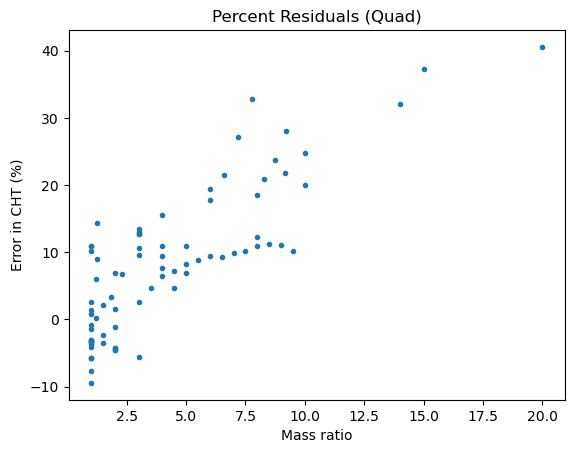

In [52]:
pred_com_hor_t_3 = common_horizon_time([ref_orb_period_3, df_3["reference_mass_ratio"]], gam)
 
plt.scatter(df_3["reference_mass_ratio"], ((pred_com_hor_t_3 - ref_com_hor_t_3)/ref_com_hor_t_3)*100, marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals (Quad)")
MSE = np.power(pred_com_hor_t_3 - ref_com_hor_t_3, 2).mean()
print(MSE)

#The MSE is noticeably worse than when I allowed the scaling constant to be fitted as well. This makes sense considering that I removed a degree of
#freedom, though perhaps this would perform better on more general data.

Text(0.5, 1.0, 'Residuals Quad')

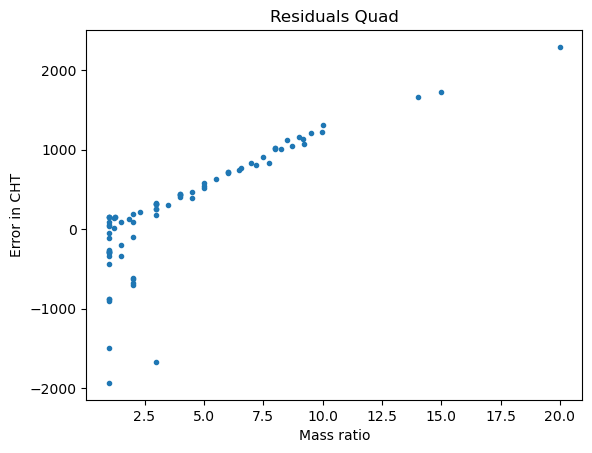

In [53]:
plt.scatter(df_3["reference_mass_ratio"], pred_com_hor_t_3 - ref_com_hor_t_3, marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT")
plt.title("Residuals (Quad)")
#It is fascinating to me just how linear the residuals are as a function of mass ratio above like q = 4. Perhaps this is just an artifact of having to
#compensate for lack of accuracy in the quadrupolar formula at high mass ratios by underestimating at low mass ratios.

In [55]:
#Here I attempt, somewhat unsuccessfully, to remove the systematic bias in the residuals at high vs. low mass ratios

def linear_residual(q, a, b):
    return a*q + b
    
params = scipy.optimize.curve_fit(linear_residual, df_3["reference_mass_ratio"], pred_com_hor_t_3 - ref_com_hor_t_3)

a, b = params[0]

print(a)
print(b)

163.5642230618168
-421.5757638430718


Text(0.5, 1.0, 'Residuals (Quad) w/Line')

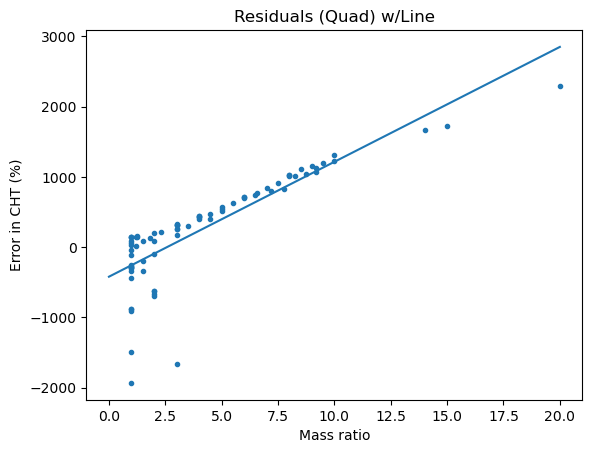

In [57]:
q_range = np.linspace(0,20,20)

plt.plot(q_range, linear_residual(q_range, a, b))
plt.scatter(df_3["reference_mass_ratio"], pred_com_hor_t_3 - ref_com_hor_t_3, marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT (%)")
plt.title("Residuals (Quad) w/Line")
#Here I make sure that my linear fit to the residuals does in fact follow the residuals

158768.16320670184


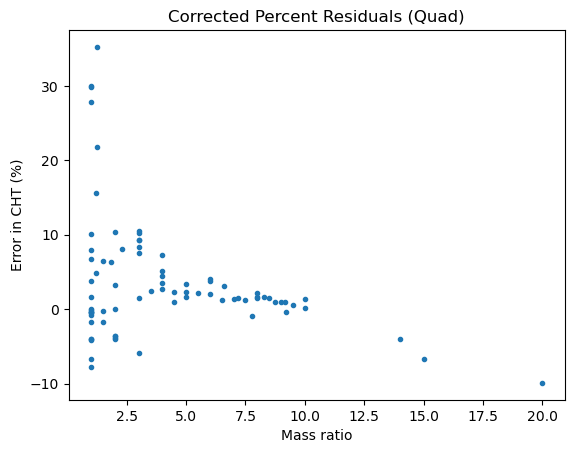

In [75]:
CHT_corrected = pred_com_hor_t_3 - ref_com_hor_t_3 - linear_residual(df_3["reference_mass_ratio"], a, b)

plt.scatter(df_3["reference_mass_ratio"], CHT_corrected/ref_com_hor_t_3*100 , marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT (%)")
plt.title("Corrected Percent Residuals (Quad)")

MSE = np.power(CHT_corrected, 2).mean()
print(MSE)

In [67]:
#This time I add back in the degree of freedom to my fitting function

def CHT_scaled(X, A, gam):
    #tau is orbital period, q is mass_ratio, A is scaling constant
    tau, q = X
    return A*tau**(gam)*(q+1)**2/q
    
param_scaled = scipy.optimize.curve_fit(CHT_scaled, [ref_orb_period_3, df_3["reference_mass_ratio"]], ref_com_hor_t_3)
A, gam = param_scaled[0]

print(r"A is " + str(round(A, 8)) + r" ± " + str(round(np.sqrt(param_scaled[1][0][0]), 8)))

print(r"Gamma is " + str(round(gam, 3)) + r" ± " + str(round(np.sqrt(param_scaled[1][1][1]), 3)))


A is 2.434e-05 ± 1.98e-06
Gamma is 2.939 ± 0.013


Text(0.5, 1.0, 'Percent Residuals (Scaled Quad)')

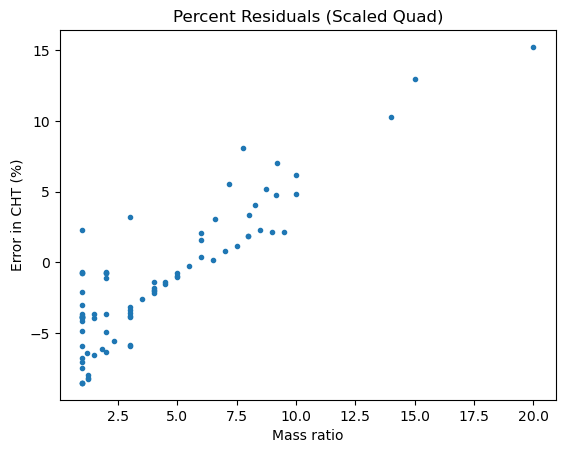

In [68]:
CHT_pred = CHT_scaled([ref_orb_period_3, df_3["reference_mass_ratio"]], A, gam)

plt.scatter(df_3["reference_mass_ratio"], (CHT_pred - ref_com_hor_t_3)/ref_com_hor_t_3*100 , marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals (Scaled Quad)")

Text(0.5, 1.0, 'Residuals (Scaled Quad) w/Line')

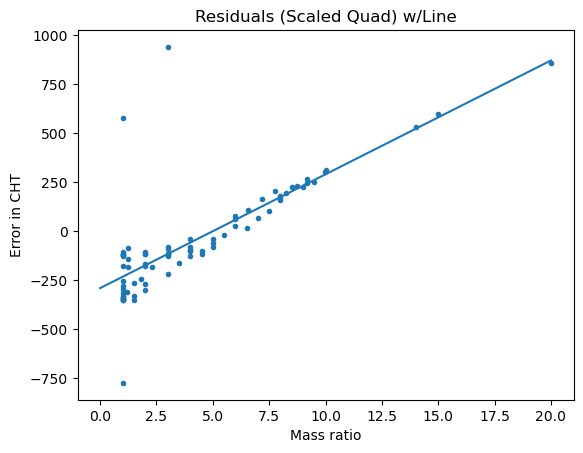

In [76]:
def linear_residual(q, a, b):
    return a*q + b
    
params = scipy.optimize.curve_fit(linear_residual, df_3["reference_mass_ratio"], CHT_pred - ref_com_hor_t_3)

a2, b2 = params[0]

plt.plot(q_range, linear_residual(q_range, a2, b2))
plt.scatter(df_3["reference_mass_ratio"], CHT_pred - ref_com_hor_t_3, marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT")
plt.title("Residuals (Scaled Quad) w/Line")

30160.306310883825


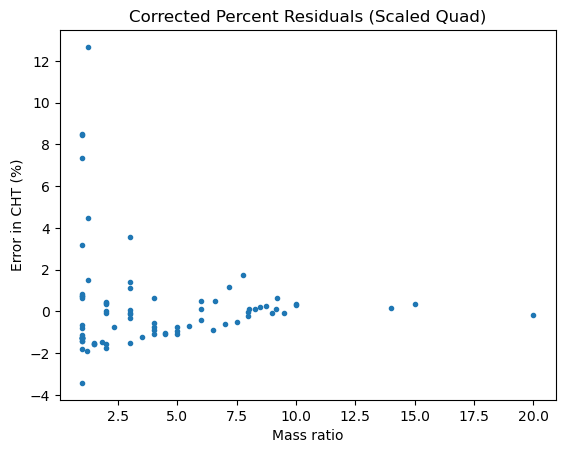

In [77]:
CHT_corrected_2 = CHT_pred - ref_com_hor_t_3 - linear_residual(df_3["reference_mass_ratio"], a2, b2)

plt.scatter(df_3["reference_mass_ratio"], CHT_corrected_2/ref_com_hor_t_3*100 , marker = ".")
plt.xlabel("Mass ratio")
plt.ylabel("Error in CHT (%)")
plt.title("Corrected Percent Residuals (Scaled Quad)")

MSE = np.power(CHT_corrected_2, 2).mean()
print(MSE)

#Unsurprisingly, removing the linear skew in the fitted residuals did in fact help a lot, but not as much the symbolic regression model was able to
#I emulated the symbolic regression model in removing the mass ratio skew in the residuals with a linear function, though it appears that the symbolic
#regression model could just do it better with its greater degrees of freedom. I wonder if there is anything of note pertaining to the orbital period
#shift